In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
heart_disease = pd.read_csv('heart-disease.csv')

In [31]:
x = heart_disease.drop('target', axis = 1)
y = heart_disease.target

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
cross_val_scored = np.mean(cross_val_score(clf, x, y, cv = 5, scoring=None))

In [33]:
print(f"Heart disease cross validataed accurace: {cross_val_scored*100:.2f}")

Heart disease cross validataed accurace: 81.50


## Area Under ROC Curve

In [34]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [36]:
from sklearn.metrics import roc_curve
clf.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
y_pred = clf.predict(x_test)

In [38]:
y_pred[:6], y_test[:6]

(array([0, 1, 1, 0, 1, 1], dtype=int64),
 179    0
 228    0
 111    1
 246    0
 60     1
 9      1
 Name: target, dtype: int64)

In [39]:
from sklearn.metrics import roc_curve
y_probs = clf.predict_proba(x_test)

In [40]:
y_probs[:6]

array([[0.91, 0.09],
       [0.47, 0.53],
       [0.47, 0.53],
       [0.89, 0.11],
       [0.18, 0.82],
       [0.15, 0.85]])

In [41]:
y_pos_prob = y_probs[:,1]

In [42]:
fpr, tpr, threshold = roc_curve(y_test, y_pos_prob)

In [57]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given fpr and tpr
    """
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    plt.plot([0,1],[0,1],color="darkblue", linestyle="--",label = "Guessing")
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.show()

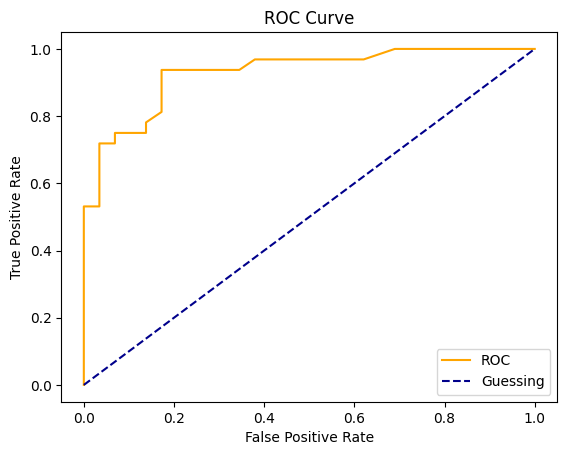

In [58]:
plot_roc_curve(fpr, tpr)

## Confusion Matrix


In [59]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(x_test)

In [60]:
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 5, 27]], dtype=int64)

In [62]:
pd.crosstab(y_test, y_preds, rownames = ["Actual labels"], colnames=["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,24,5
1,5,27


In [63]:
import seaborn as sns

<Axes: >

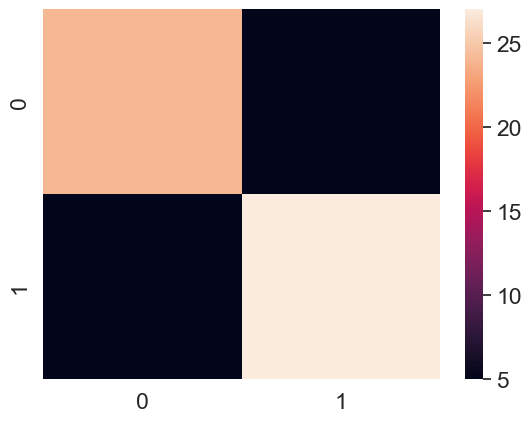

In [64]:
sns.set(font_scale = 1.5)
conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat)

In [66]:
import sklearn
sklearn.__version__

'1.3.2'

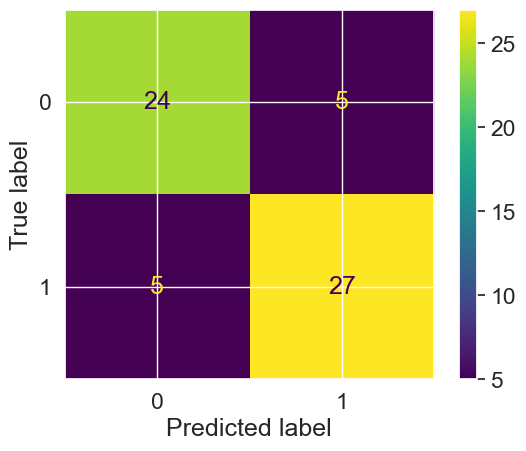

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true = y_test, 
                                       y_pred = y_preds)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [71]:
pd.DataFrame(classification_report(y_test,y_preds))

ValueError: DataFrame constructor not properly called!